# imports

In [1]:
import sys
sys.path.append('../src/')

from collections import OrderedDict
import torch

from data import get_loader
from filters import kalman_filter
from models import MLP
from utils import draw_weights, init_model, plot_density, plot_training, validate

# config

In [2]:
batch_size = 256
dataset = 'mnist'
epochs = 20
hidden_size = [1024, 512, 256]
# hidden_size = [128]
learning_rate = 1e-1
log_intv = 50

device = torch.device('cuda:0')

# dataloader and model

In [3]:
trainloader = get_loader(dataset, batch_size, train=True)
testloader = get_loader(dataset, batch_size, train=False)

model = MLP(hidden_size=hidden_size).to(device)
init_model(model)

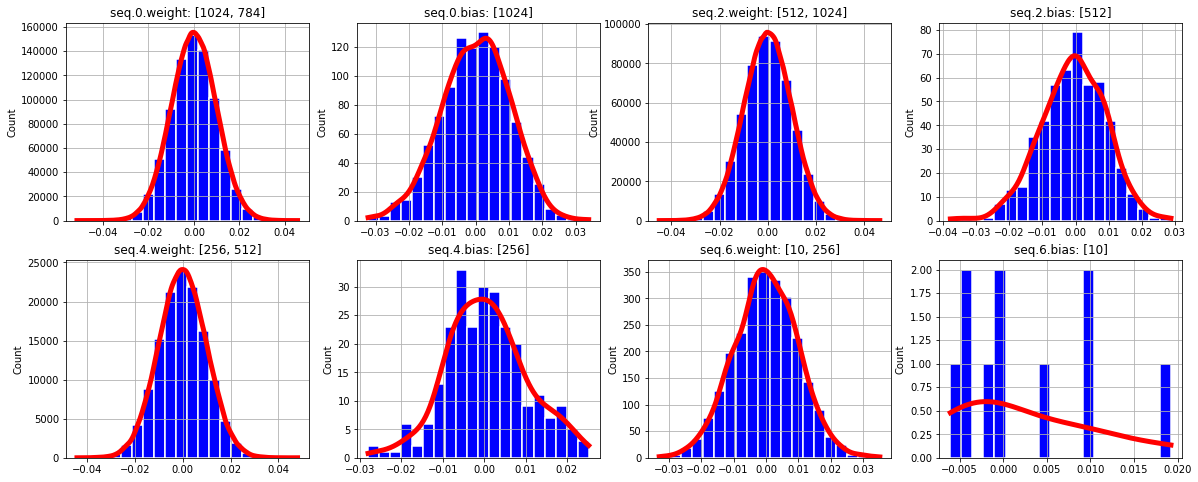

In [4]:
plot_density(model, bins=20)

# training

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

- $\mu_k(0)$ and $\sigma_k(0)$ is initialized for the model
- Also, initialize estimate covariances $P_{\mu}(0)$ and $P_{\sigma}(0)$
- Initialize small values of $\sigma_{\mu}$, $\tilde{\sigma}_{\mu}$, $\sigma_{\sigma}$, $\tilde{\sigma}_{\sigma}$

In [6]:
std_mu = 1e-4
std_mu_ = 1e-4
std_var = 1e-4
std_var_ = 1e-4

In [7]:
model_mu = OrderedDict()
model_var = OrderedDict()
P_mu = OrderedDict()
P_var = OrderedDict()

for name, param in model.named_parameters():
    model_mu[name] = torch.zeros(param.size())
    model_var[name] = torch.ones(param.size())*(0.01**2)
    
    P_mu[name] = torch.zeros(param.size())
    P_var[name] = torch.zeros(param.size())

[epoch:   1, batch:    0] loss: 2.302829 	 acc: 0.12
[epoch:   1, batch:   50] loss: 2.301126 	 acc: 0.11
[epoch:   1, batch:  100] loss: 2.296864 	 acc: 0.11
[epoch:   1, batch:  150] loss: 2.275777 	 acc: 0.23
[epoch:   1, batch:  200] loss: 1.848224 	 acc: 0.39


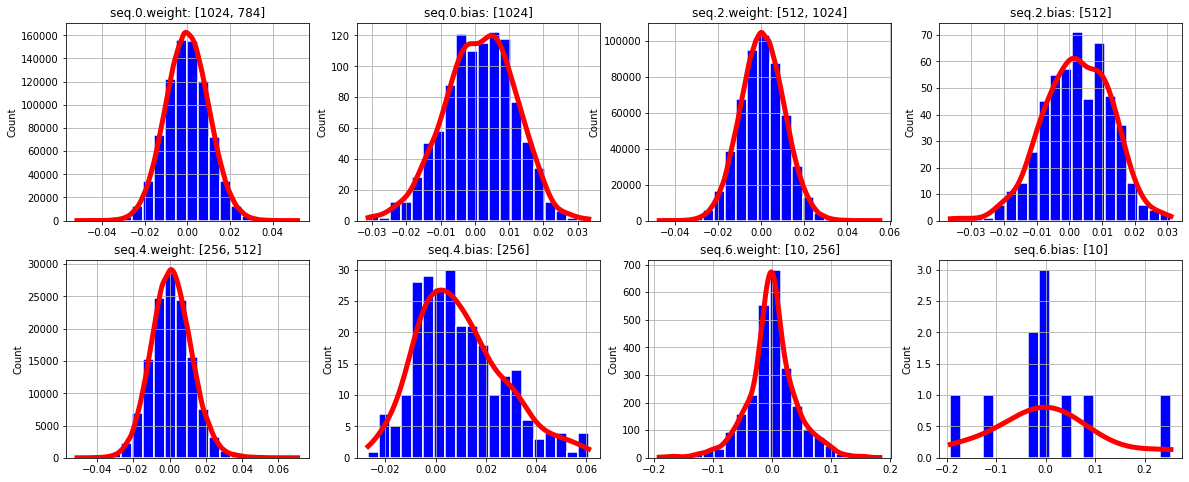

[epoch:   2, batch:    0] loss: 0.941319 	 acc: 0.67
[epoch:   2, batch:   50] loss: 0.786483 	 acc: 0.73
[epoch:   2, batch:  100] loss: 0.560348 	 acc: 0.83
[epoch:   2, batch:  150] loss: 0.436860 	 acc: 0.87
[epoch:   2, batch:  200] loss: 0.372125 	 acc: 0.89


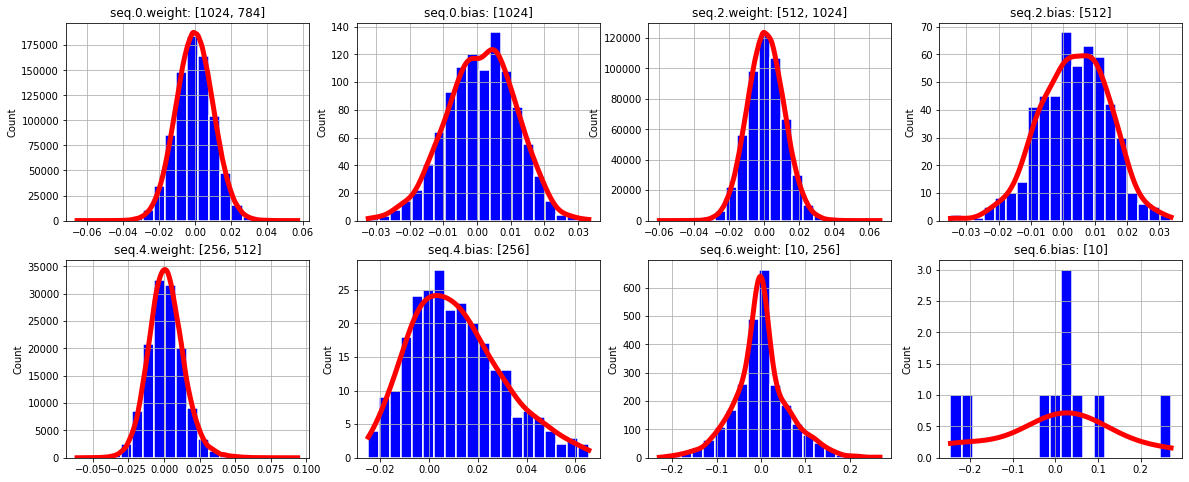

[epoch:   3, batch:    0] loss: 0.329812 	 acc: 0.89
[epoch:   3, batch:   50] loss: 0.275883 	 acc: 0.92
[epoch:   3, batch:  100] loss: 0.240359 	 acc: 0.93
[epoch:   3, batch:  150] loss: 0.219034 	 acc: 0.94
[epoch:   3, batch:  200] loss: 0.213635 	 acc: 0.94


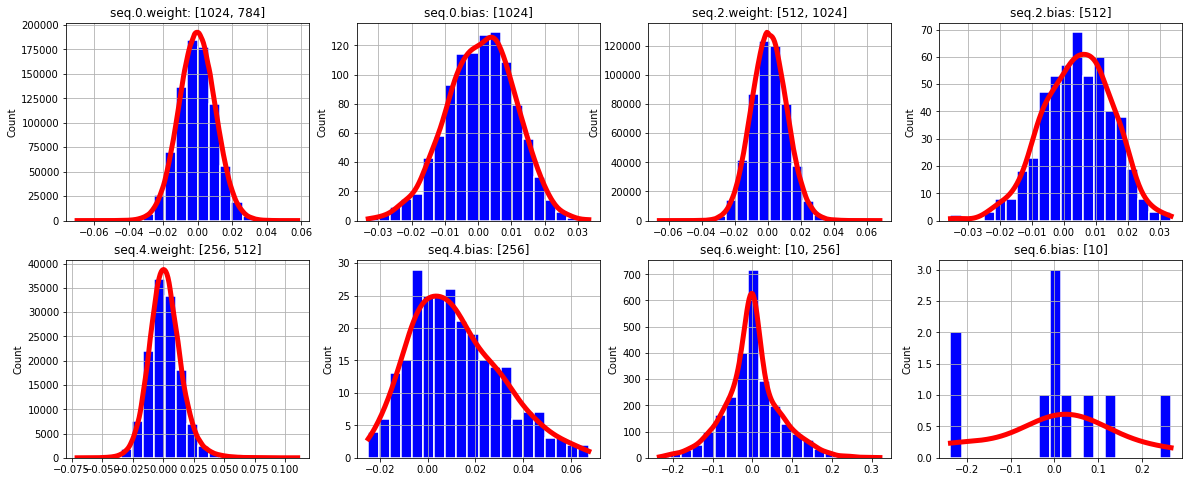

[epoch:   4, batch:    0] loss: 0.122806 	 acc: 0.95
[epoch:   4, batch:   50] loss: 0.167945 	 acc: 0.95
[epoch:   4, batch:  100] loss: 0.155377 	 acc: 0.95
[epoch:   4, batch:  150] loss: 0.141799 	 acc: 0.96
[epoch:   4, batch:  200] loss: 0.139456 	 acc: 0.96


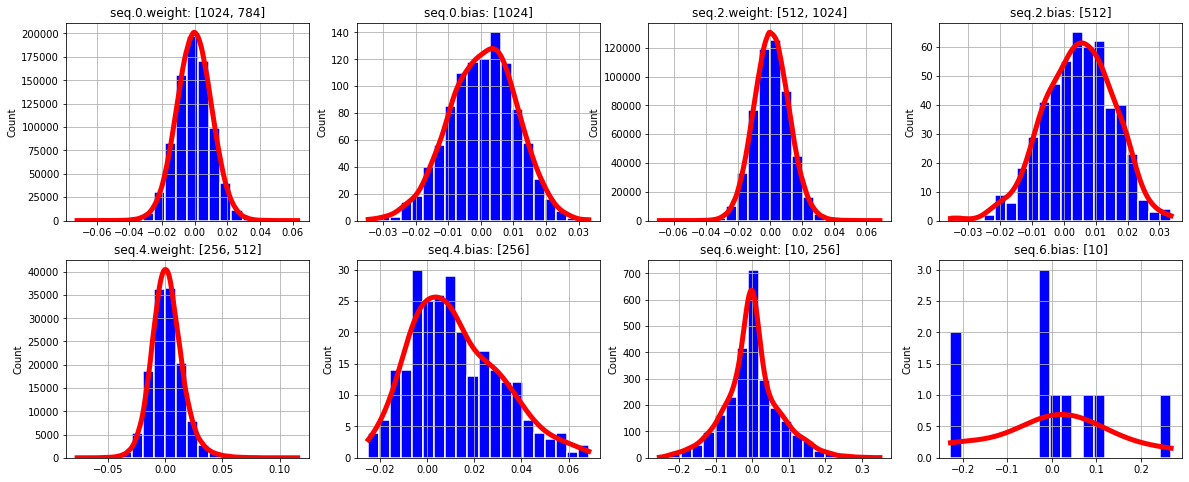

[epoch:   5, batch:    0] loss: 0.140002 	 acc: 0.96
[epoch:   5, batch:   50] loss: 0.114116 	 acc: 0.97
[epoch:   5, batch:  100] loss: 0.108828 	 acc: 0.97
[epoch:   5, batch:  150] loss: 0.113714 	 acc: 0.97
[epoch:   5, batch:  200] loss: 0.108761 	 acc: 0.97


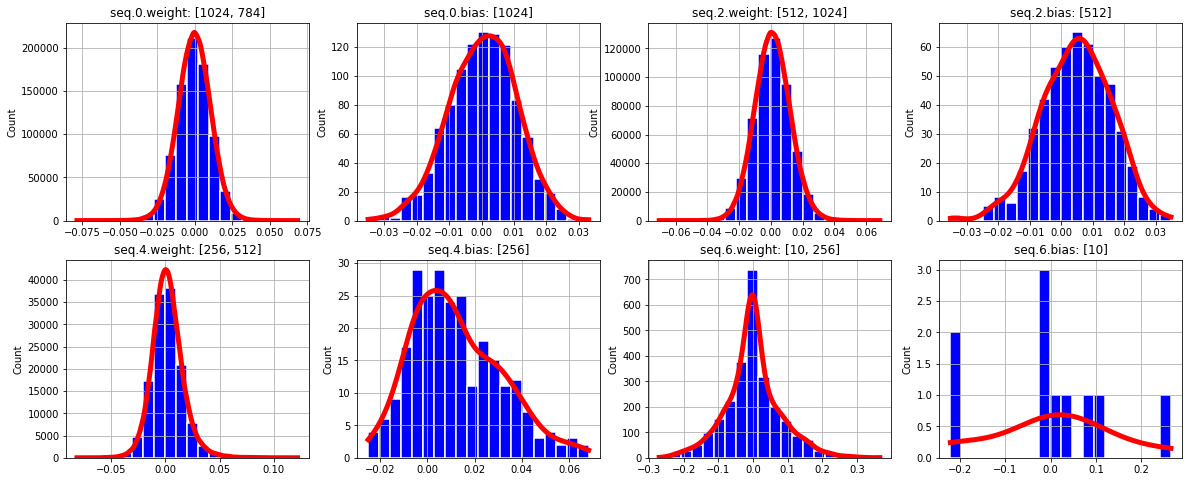

[epoch:   6, batch:    0] loss: 0.071498 	 acc: 0.98
[epoch:   6, batch:   50] loss: 0.087590 	 acc: 0.97
[epoch:   6, batch:  100] loss: 0.087553 	 acc: 0.97
[epoch:   6, batch:  150] loss: 0.082305 	 acc: 0.98
[epoch:   6, batch:  200] loss: 0.089178 	 acc: 0.97


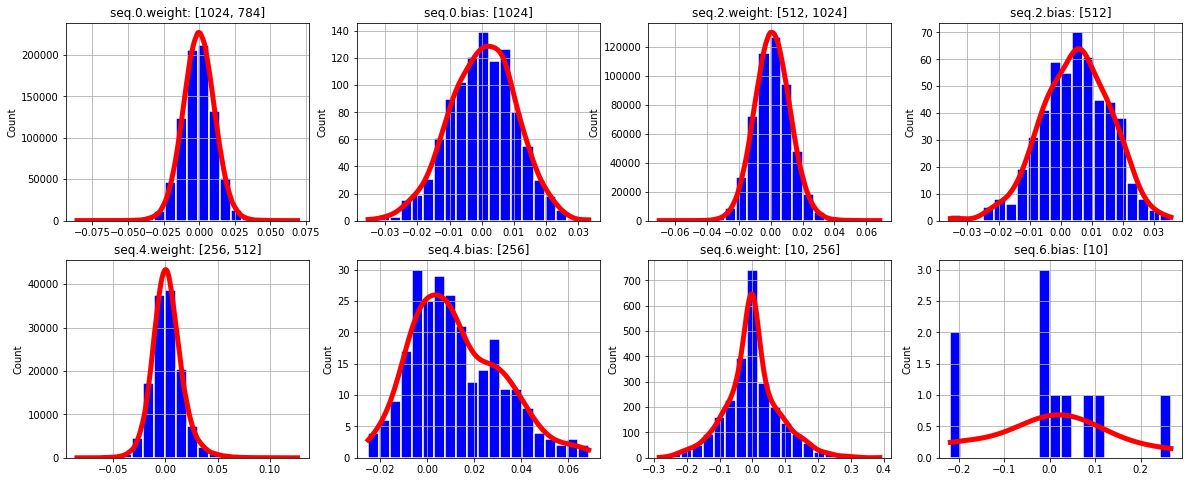

[epoch:   7, batch:    0] loss: 0.077872 	 acc: 0.98
[epoch:   7, batch:   50] loss: 0.069221 	 acc: 0.98
[epoch:   7, batch:  100] loss: 0.064859 	 acc: 0.98
[epoch:   7, batch:  150] loss: 0.063649 	 acc: 0.98
[epoch:   7, batch:  200] loss: 0.065776 	 acc: 0.98


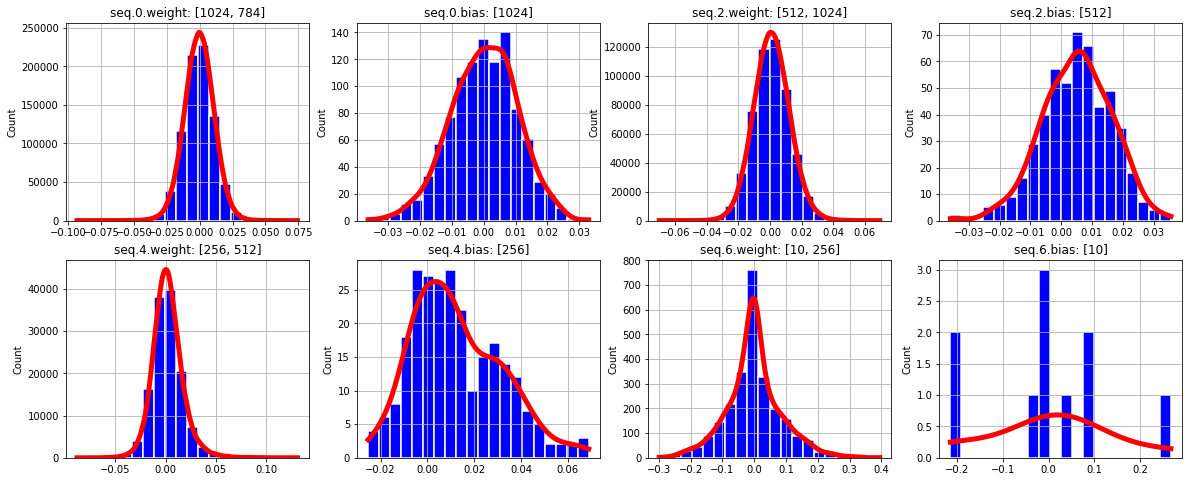

[epoch:   8, batch:    0] loss: 0.094138 	 acc: 0.98
[epoch:   8, batch:   50] loss: 0.057205 	 acc: 0.98
[epoch:   8, batch:  100] loss: 0.054673 	 acc: 0.98
[epoch:   8, batch:  150] loss: 0.055307 	 acc: 0.98
[epoch:   8, batch:  200] loss: 0.054726 	 acc: 0.98


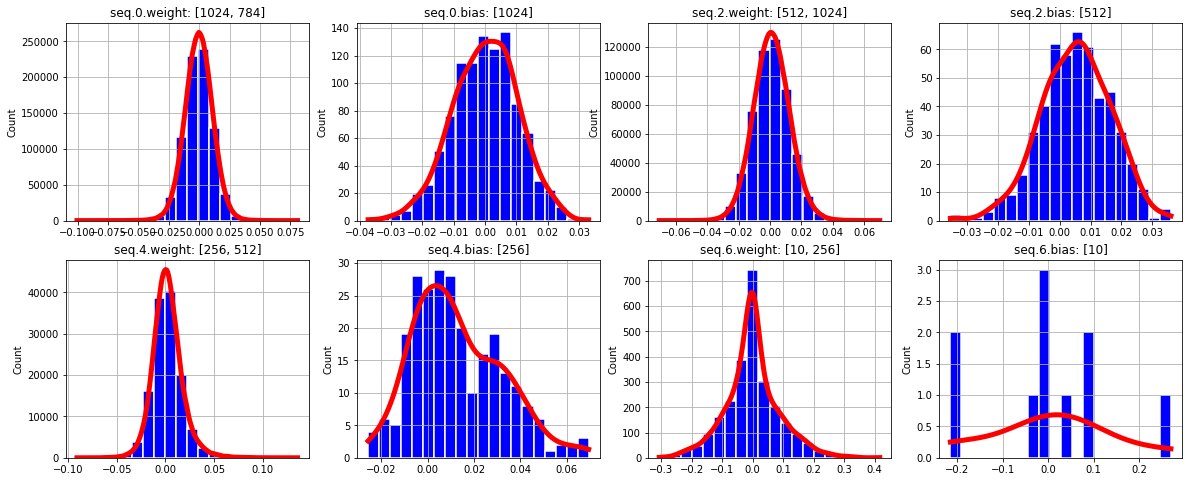

[epoch:   9, batch:    0] loss: 0.047637 	 acc: 0.98
[epoch:   9, batch:   50] loss: 0.041216 	 acc: 0.99
[epoch:   9, batch:  100] loss: 0.047923 	 acc: 0.99
[epoch:   9, batch:  150] loss: 0.048328 	 acc: 0.99
[epoch:   9, batch:  200] loss: 0.041226 	 acc: 0.99


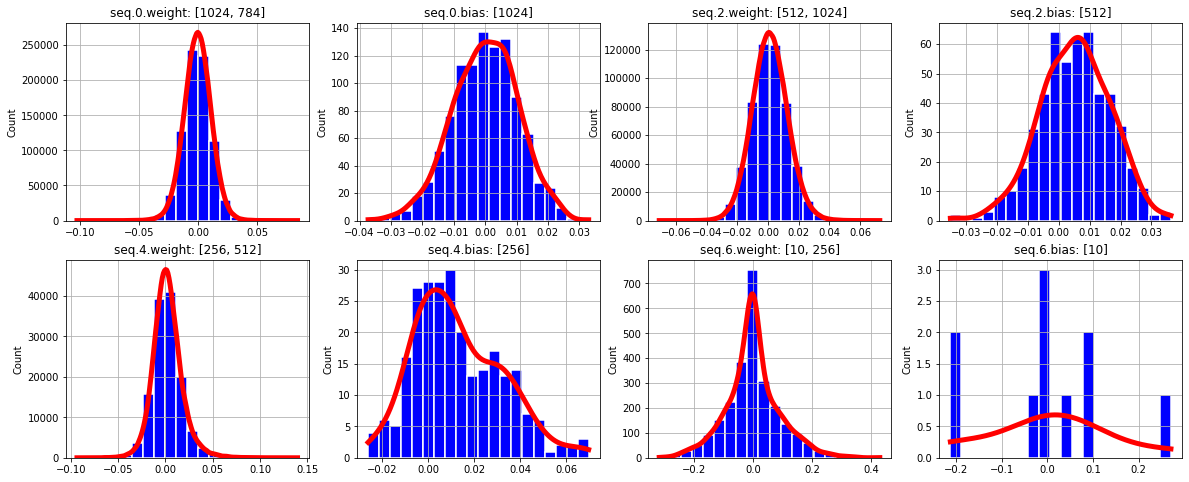

[epoch:  10, batch:    0] loss: 0.076251 	 acc: 0.97
[epoch:  10, batch:   50] loss: 0.035887 	 acc: 0.99
[epoch:  10, batch:  100] loss: 0.032853 	 acc: 0.99
[epoch:  10, batch:  150] loss: 0.038260 	 acc: 0.99
[epoch:  10, batch:  200] loss: 0.035899 	 acc: 0.99


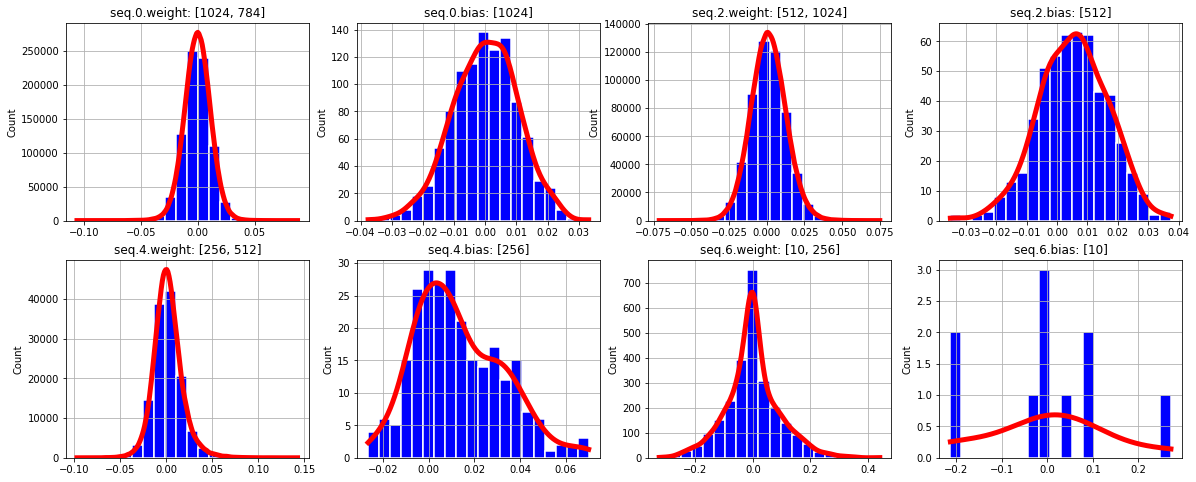

[epoch:  11, batch:    0] loss: 0.024946 	 acc: 0.99
[epoch:  11, batch:   50] loss: 0.028571 	 acc: 0.99
[epoch:  11, batch:  100] loss: 0.026687 	 acc: 0.99
[epoch:  11, batch:  150] loss: 0.028454 	 acc: 0.99
[epoch:  11, batch:  200] loss: 0.027395 	 acc: 0.99


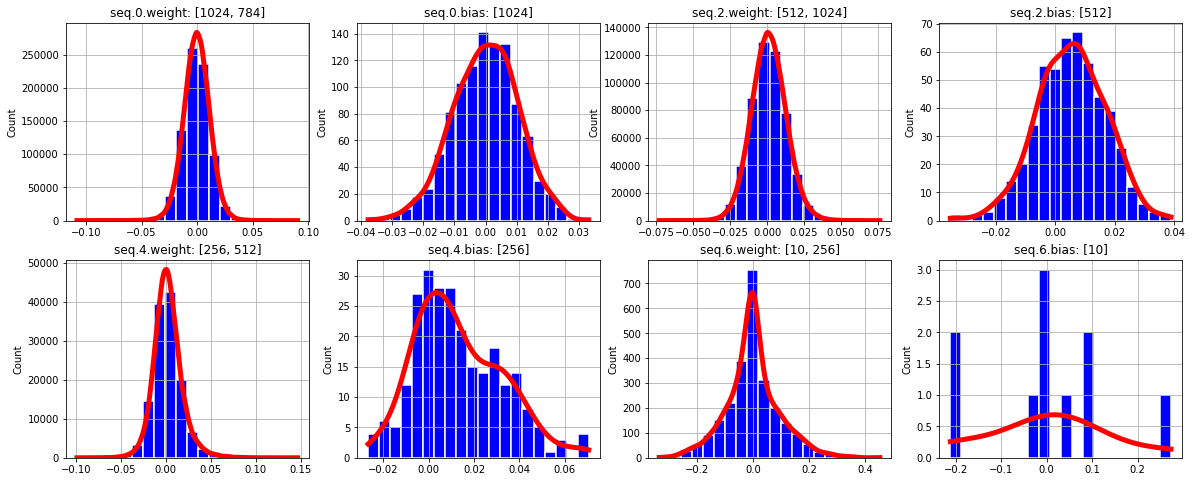

[epoch:  12, batch:    0] loss: 0.040369 	 acc: 1.00
[epoch:  12, batch:   50] loss: 0.020055 	 acc: 1.00
[epoch:  12, batch:  100] loss: 0.022146 	 acc: 0.99
[epoch:  12, batch:  150] loss: 0.022598 	 acc: 0.99
[epoch:  12, batch:  200] loss: 0.022125 	 acc: 0.99


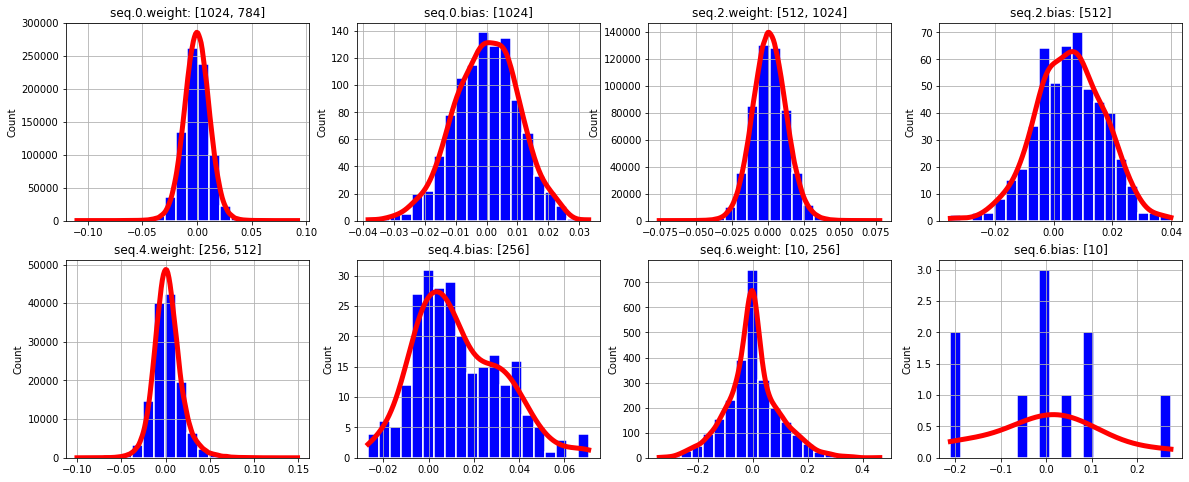

[epoch:  13, batch:    0] loss: 0.012451 	 acc: 1.00
[epoch:  13, batch:   50] loss: 0.015648 	 acc: 1.00
[epoch:  13, batch:  100] loss: 0.016680 	 acc: 1.00
[epoch:  13, batch:  150] loss: 0.017393 	 acc: 1.00
[epoch:  13, batch:  200] loss: 0.018321 	 acc: 0.99


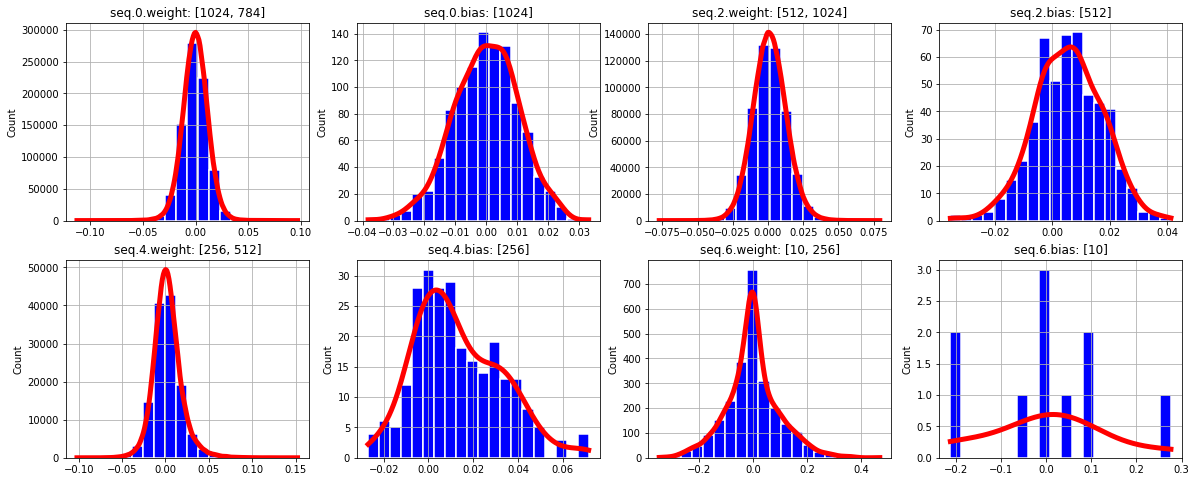

[epoch:  14, batch:    0] loss: 0.011754 	 acc: 1.00
[epoch:  14, batch:   50] loss: 0.011434 	 acc: 1.00
[epoch:  14, batch:  100] loss: 0.014676 	 acc: 1.00
[epoch:  14, batch:  150] loss: 0.014917 	 acc: 1.00
[epoch:  14, batch:  200] loss: 0.014867 	 acc: 1.00


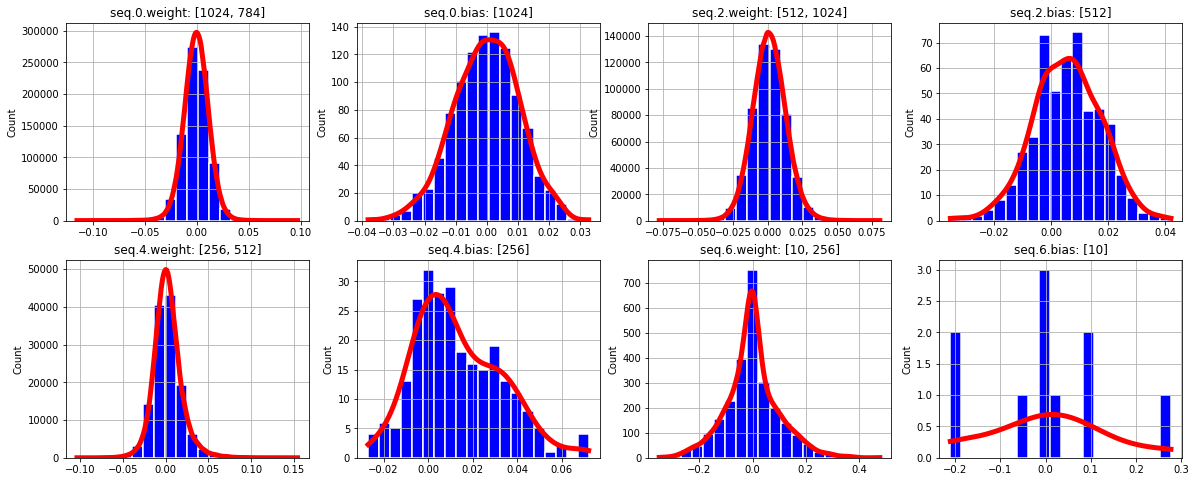

[epoch:  15, batch:    0] loss: 0.006946 	 acc: 1.00
[epoch:  15, batch:   50] loss: 0.011445 	 acc: 1.00
[epoch:  15, batch:  100] loss: 0.009686 	 acc: 1.00
[epoch:  15, batch:  150] loss: 0.008465 	 acc: 1.00
[epoch:  15, batch:  200] loss: 0.012654 	 acc: 1.00


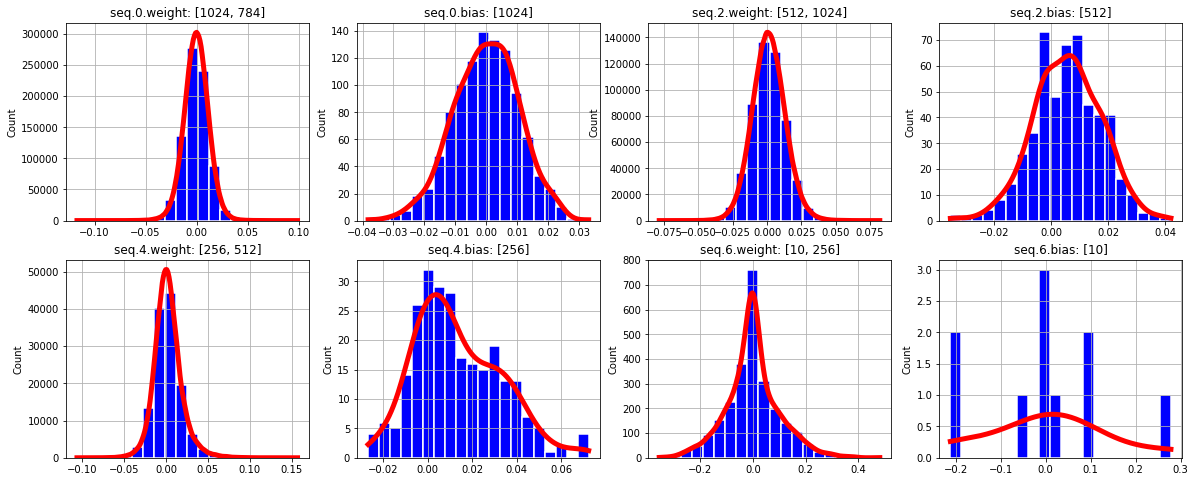

[epoch:  16, batch:    0] loss: 0.056756 	 acc: 0.98
[epoch:  16, batch:   50] loss: 0.013566 	 acc: 1.00
[epoch:  16, batch:  100] loss: 0.007717 	 acc: 1.00
[epoch:  16, batch:  150] loss: 0.007458 	 acc: 1.00
[epoch:  16, batch:  200] loss: 0.008224 	 acc: 1.00


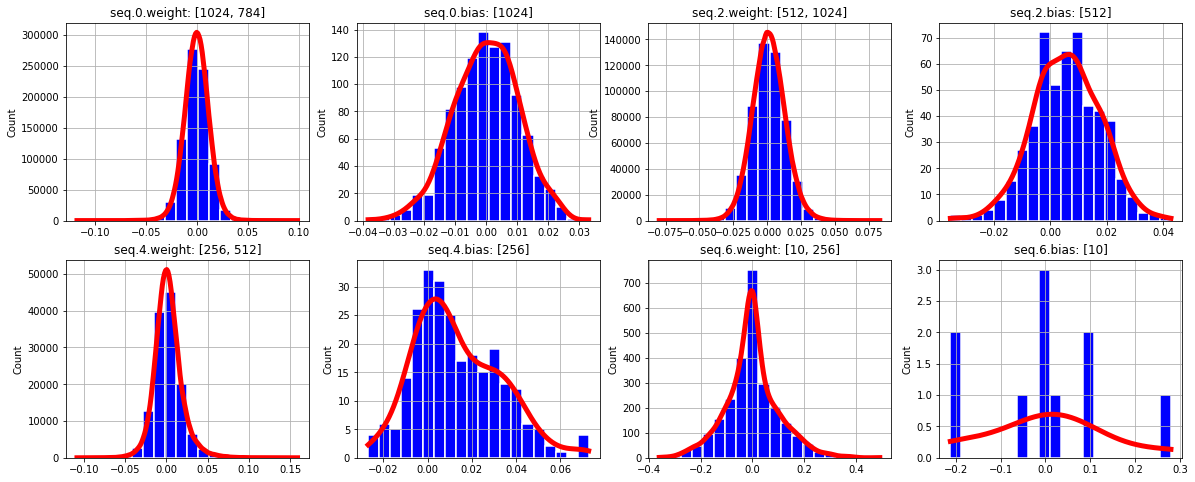

[epoch:  17, batch:    0] loss: 0.005869 	 acc: 1.00
[epoch:  17, batch:   50] loss: 0.007881 	 acc: 1.00
[epoch:  17, batch:  100] loss: 0.005500 	 acc: 1.00
[epoch:  17, batch:  150] loss: 0.006252 	 acc: 1.00
[epoch:  17, batch:  200] loss: 0.005468 	 acc: 1.00


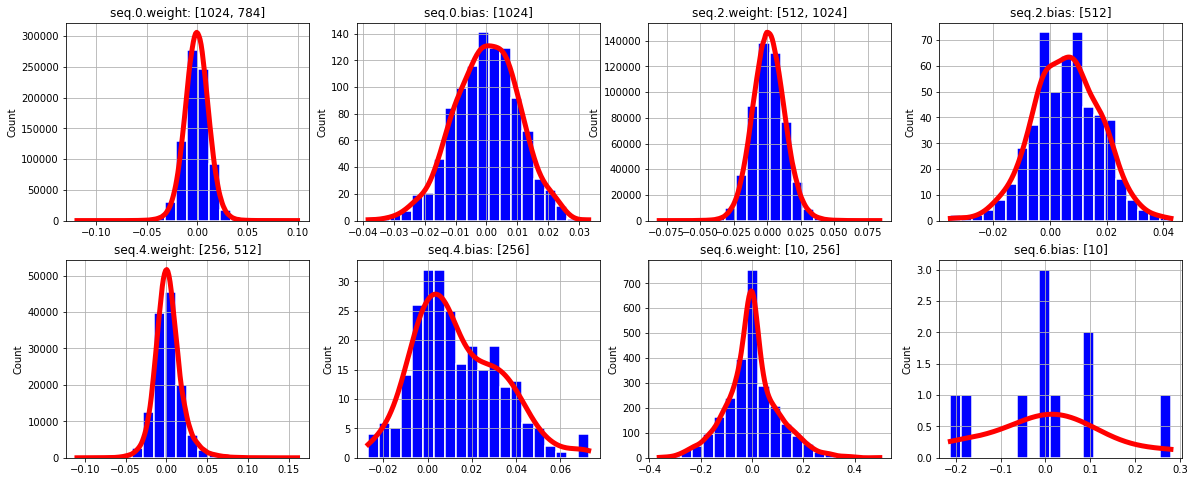

[epoch:  18, batch:    0] loss: 0.002713 	 acc: 1.00
[epoch:  18, batch:   50] loss: 0.004442 	 acc: 1.00
[epoch:  18, batch:  100] loss: 0.005134 	 acc: 1.00
[epoch:  18, batch:  150] loss: 0.006215 	 acc: 1.00
[epoch:  18, batch:  200] loss: 0.004625 	 acc: 1.00


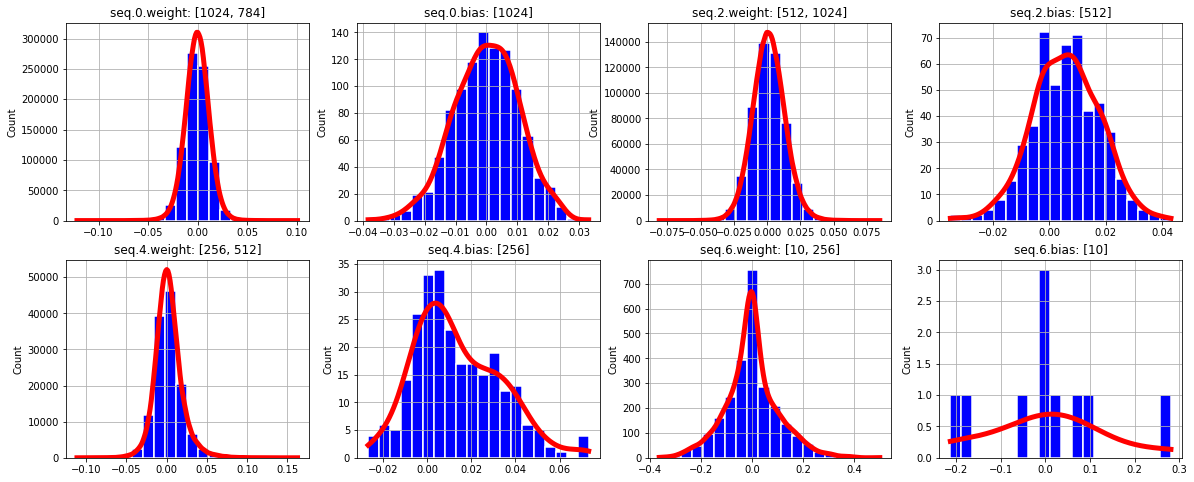

[epoch:  19, batch:    0] loss: 0.003487 	 acc: 1.00
[epoch:  19, batch:   50] loss: 0.003095 	 acc: 1.00
[epoch:  19, batch:  100] loss: 0.004016 	 acc: 1.00
[epoch:  19, batch:  150] loss: 0.005725 	 acc: 1.00
[epoch:  19, batch:  200] loss: 0.003626 	 acc: 1.00


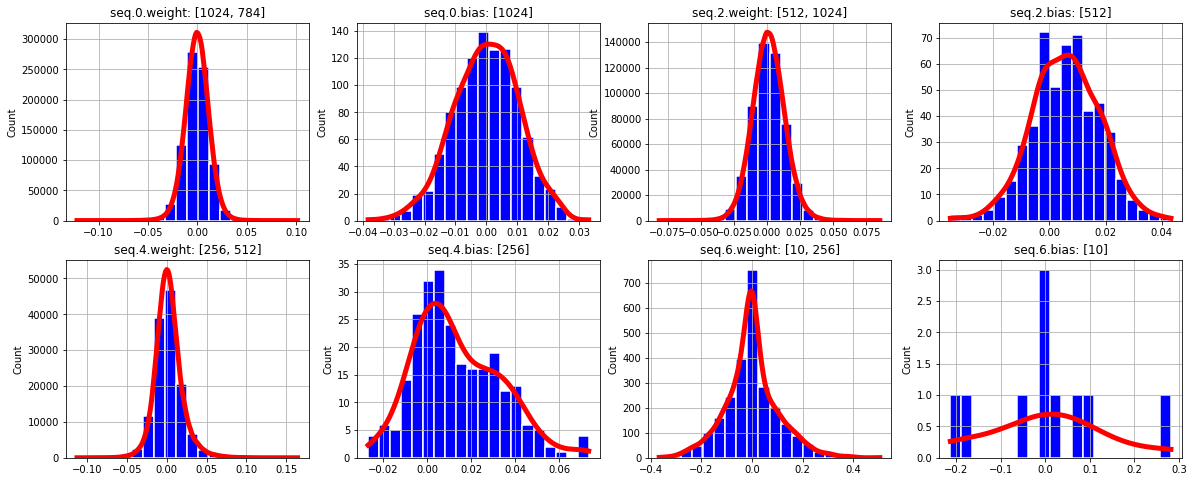

[epoch:  20, batch:    0] loss: 0.010850 	 acc: 1.00
[epoch:  20, batch:   50] loss: 0.002546 	 acc: 1.00
[epoch:  20, batch:  100] loss: 0.002796 	 acc: 1.00
[epoch:  20, batch:  150] loss: 0.002687 	 acc: 1.00
[epoch:  20, batch:  200] loss: 0.003971 	 acc: 1.00


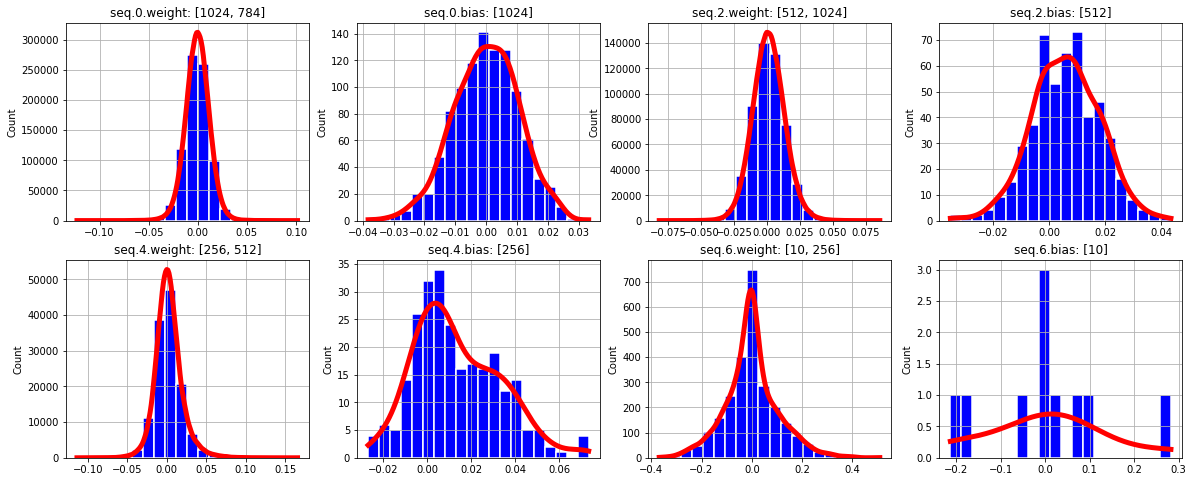

In [8]:
h_epoch, h_acc, h_loss = [], [], []
for epoch in range(1, epochs+1):
    
    running_loss = 0.0
    running_acc = 0.0
    running_count = 0
    epoch_loss = 0
    epoch_acc = 0
    for i, (Y, X) in enumerate(trainloader):
        Y, X = Y.to(device), X.to(device)
        
        X_ = model(Y)
        loss = loss_fn(X_, X)
        running_loss += loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
        pred = X_.argmax(axis=1, keepdim=True)
        running_acc += pred.eq(X.view_as(pred)).sum().item()/len(X)
        running_count += 1
        
        # logging
        if i % log_intv == 0:
            epoch_loss = running_loss/running_count
            epoch_acc = running_acc/running_count
            print('[epoch: {:3d}, batch: {:4d}] loss: {:.6f} \t acc: {:.2f}'.format(
                epoch, i, epoch_loss, epoch_acc))
            running_loss = 0.0
            running_acc = 0.0
            running_count = 0
            
        # kalman filtering
        model_mu, model_var, P_mu, P_var = kalman_filter(
            model, learning_rate, 
            model_mu, model_var, P_mu, P_var,
            std_mu, std_mu_, std_var, std_var_
        )
    h_epoch.append(epoch)
    h_acc.append(epoch_acc)
    h_loss.append(epoch_loss)
    plot_density(model, bins=20)

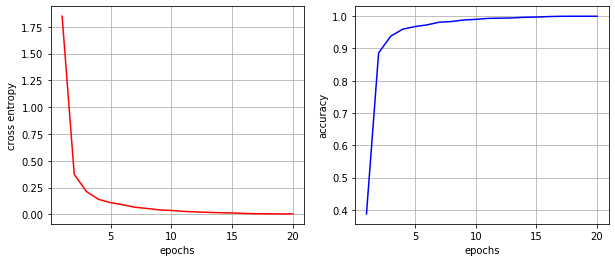

In [9]:
plot_training(h_epoch, h_acc, h_loss)

# validate training

In [10]:
validate(model, testloader, device)

0.98

# draw model

In [11]:
drawn_weights = draw_weights(model_mu, model_var, device)
drawn_model = MLP(hidden_size=hidden_size).to(device)
drawn_model.load_state_dict(drawn_weights)

<All keys matched successfully>

In [12]:
validate(drawn_model, testloader, device)

0.979